In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [12]:
# my_data_dir='C:/Users/amayd/Downloads/assignment cataract/processed_images/'
my_data_dir = '/content/drive/MyDrive/assignment cataract/processed_images/'

In [13]:
os.listdir(my_data_dir)

['train', 'test']

In [14]:
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [15]:
os.listdir(train_path)

['cataract', 'normal']

In [16]:
os.listdir(test_path)

['normal', 'cataract']

In [17]:
plant_types = ["normal", "cataract"]

# Her bir bitki türü için boş liste oluştur
cataract = []
normal = []

# Her bir bitki türü için dosya sayısını hesaplayın
total_images = 0
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(train_path, plant_type))

    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "cataract":
        cataract.extend(file_list)
    elif plant_type == "normal":
        normal.extend(file_list)

    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))

    # Toplam dosya sayısını güncelleyin
    total_images += len(file_list)

# Toplam dosya sayısını yazdırın
print("Total images:", total_images)

Number of normal images: 246
Number of cataract images: 245
Total images: 491


In [18]:
plant_types = ["normal", "cataract"]

# Her bir bitki türü için boş liste oluştur
cataract = []
normal = []

# Her bir bitki türü için dosya sayısını hesaplayın
total_images = 0
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(test_path, plant_type))

    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "cataract":
        cataract.extend(file_list)
    elif plant_type == "normal":
        normal.extend(file_list)

    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))

    # Toplam dosya sayısını güncelleyin
    total_images += len(file_list)

# Toplam dosya sayısını yazdırın
print("Total images:", total_images)

Number of normal images: 60
Number of cataract images: 61
Total images: 121


In [19]:
print(f"Train: {len(os.listdir(train_path+'/normal'))}")
print(f"Test: {len(os.listdir(test_path+'/normal'))}")

Train: 246
Test: 60


In [20]:
os.listdir(train_path+'/normal')[0]

'image_104.png'

In [21]:
path1=train_path+'/normal'+'/image_138.png'
path2=train_path+'/cataract'+'/image_138.png'

In [22]:
normal_img=imread(path1)
cataract_img=imread(path2)

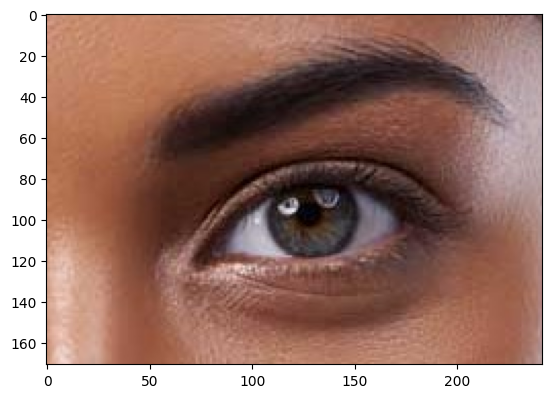

In [23]:
plt.imshow(normal_img)

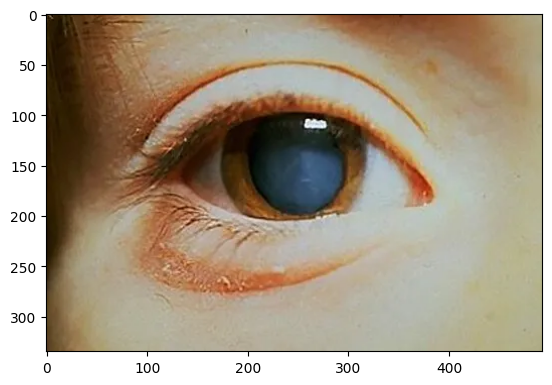

In [24]:
plt.imshow(cataract_img)

In [25]:
normal_img.max()

1.0

In [26]:
normal_img.min()

0.0

In [27]:
normal_img.shape

(171, 242, 3)

In [28]:
cataract_img.shape

(335, 493, 3)

#### Normal Shape mean

In [29]:
x= []
y = []
for image in os.listdir(train_path+'/normal'):

    img = imread(train_path+'/normal/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<Axes: >

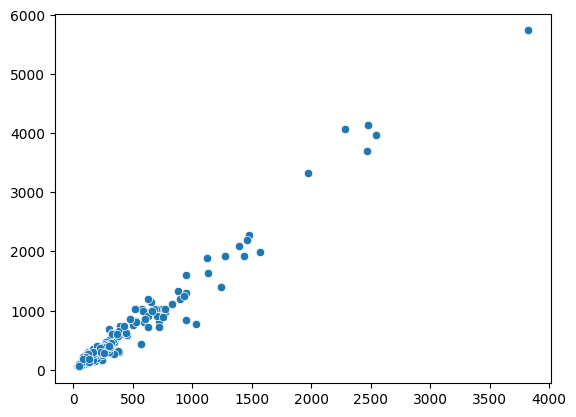

In [30]:
sns.scatterplot(x=x,y=y)

In [31]:
np.mean(x)

406.5081300813008

In [32]:
np.mean(y)

594.1422764227642

#### Cataract mean shape

In [33]:
x= []
y = []
for image in os.listdir(train_path+'/cataract'):

    img = imread(train_path+'/cataract/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

In [34]:
np.mean(x)

606.1183673469387

In [35]:
np.mean(y)

925.3591836734694

<Axes: >

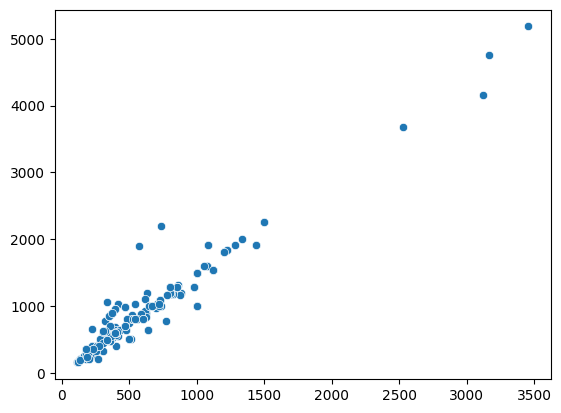

In [36]:
sns.scatterplot(x=x,y=y)

In [37]:
image_shape = (500,800,3)

#### CNN

Training set class distribution: {'cataract': 245, 'normal': 246}
Test set class distribution: {'normal': 60, 'cataract': 61}
Found 393 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
      

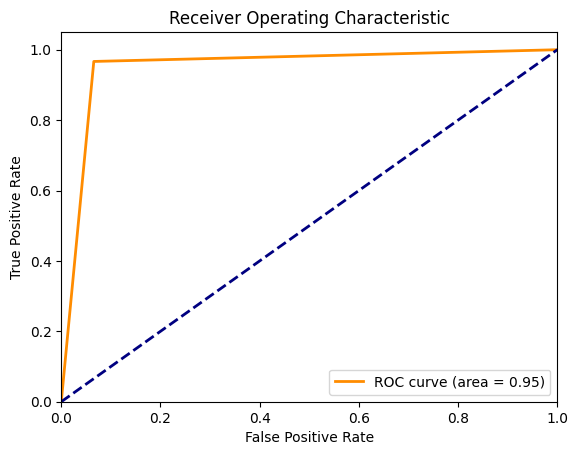

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
train_path = '/content/drive/MyDrive/assignment cataract/processed_images/train'
test_path = '/content/drive/MyDrive/assignment cataract/processed_images/test'

# Function to count the number of images in each class
def count_images(path):
    class_counts = {}
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            class_name = os.path.basename(root)
            class_counts[class_name] = len(files)
    return class_counts

# Print image counts
train_counts = count_images(train_path)
test_counts = count_images(test_path)

print("Training set class distribution:", train_counts)
print("Test set class distribution:", test_counts)

# Data Augmentation with validation split
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Training data generator
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data generator
val_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Test data generator
test_image_gen = ImageDataGenerator().flow_from_directory(
    test_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Model Architecture with custom CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Class Weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(train_image_gen.classes),
                                                  y=train_image_gen.classes)
class_weights = dict(enumerate(class_weights))

# Train the model
results_cnn = model_cnn.fit(train_image_gen, epochs=30,
                    validation_data=val_image_gen,
                    callbacks=[early_stop, reduce_lr],
                    class_weight=class_weights)

# Evaluate the model
predictions = model_cnn.predict(test_image_gen)
predictions = np.where(predictions > 0.5, 1, 0)

print(classification_report(test_image_gen.classes, predictions))
print(confusion_matrix(test_image_gen.classes, predictions))

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_image_gen.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [40]:
model_cnn.save('CNNmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### EfficientNet

Training set class distribution: {'cataract': 245, 'normal': 246}
Test set class distribution: {'normal': 60, 'cataract': 61}
Found 393 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_

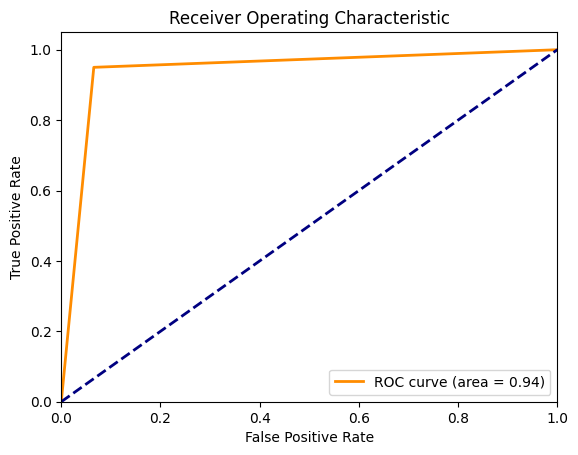

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
train_path = '/content/drive/MyDrive/assignment cataract/processed_images/train'
test_path = '/content/drive/MyDrive/assignment cataract/processed_images/test'

# Function to count the number of images in each class
def count_images(path):
    class_counts = {}
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            class_name = os.path.basename(root)
            class_counts[class_name] = len(files)
    return class_counts

# Print image counts
train_counts = count_images(train_path)
test_counts = count_images(test_path)

print("Training set class distribution:", train_counts)
print("Test set class distribution:", test_counts)

# Data Augmentation with validation split
image_gen = ImageDataGenerator(
    rotation_range=20,  # Reduce rotation range
    width_shift_range=0.1,  # Reduce shift ranges
    height_shift_range=0.1,
    shear_range=0.1,  # Reduce shear range
    zoom_range=0.1,  # Reduce zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Training data generator
train_image_gen = image_gen.flow_from_directory(
    train_path,  # Path to training data
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

# Validation data generator
val_image_gen = image_gen.flow_from_directory(
    train_path,  # Same directory as training data
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

# Test data generator
test_image_gen = ImageDataGenerator().flow_from_directory(
    test_path,  # Path to test data
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for evaluation to keep order
)

# Model Architecture with EfficientNet
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

# Class Weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(train_image_gen.classes),
                                                  y=train_image_gen.classes)
class_weights = dict(enumerate(class_weights))

# Train the model
results = model.fit(train_image_gen, epochs=30,
                    validation_data=val_image_gen,
                    callbacks=[early_stop, reduce_lr],
                    class_weight=class_weights)

# Evaluate the model
predictions = model.predict(test_image_gen)
preds = predictions
predictions = np.where(predictions > 0.5, 1, 0)

print(classification_report(test_image_gen.classes, predictions))
print(confusion_matrix(test_image_gen.classes, predictions))

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_image_gen.classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(test_image_gen.class_indices)

{'cataract': 0, 'normal': 1}


In [ ]:
print(train_image_gen.class_indices)

{'cataract': 0, 'normal': 1}


In [ ]:
model.save('cataractEfficientNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
